## Product Price Recommendation for Online Sellers 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("synthetic_data.csv", encoding='unicode_escape')

In [3]:
df.head()

,ProductID,ProductName,Brand,Category,Weight,Dimensions,Material,Color,Rating,NumReviews,Price
0,1,Laptop,XYZ Corp,Laptops,2.5,13x9x0.7,Aluminum,Silver,4.5,120,1200
1,2,Smartphone,ABC Inc,Mobile Phones,0.2,5.7x2.8x0.3,Glass,Black,4.8,300,800
2,3,Headphones,SoundWave,Electronics,0.4,8x7x2,Plastic,White,4.3,80,100
3,4,Smartwatch,TechGuru,Wearable Tech,0.1,1.5x1.5x0.4,Plastic,Black,4.6,150,250
4,5,Bluetooth Speaker,AudioKing,Audio Devices,1.0,7x7x3,Metal,Red,4.2,50,80


In [4]:
df.shape

(120, 11)

In [5]:
df.describe()

,ProductID,Weight,Rating,NumReviews,Price
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,60.500000,0.766250,4.486667,140.916667,100.666667
std,34.785054,1.609754,0.179604,60.349066,164.478975
min,1.000000,0.050000,4.000000,20.000000,10.000000
25%,30.750000,0.200000,4.400000,97.500000,30.000000
50%,60.500000,0.300000,4.500000,150.000000,50.000000
75%,90.250000,0.700000,4.600000,185.000000,100.000000
max,120.000000,12.000000,4.900000,300.000000,1200.000000


In [6]:
df.dtypes

ProductID        int64
ProductName     object
Brand           object
Category        object
Weight         float64
Dimensions      object
Material        object
Color           object
Rating         float64
NumReviews       int64
Price            int64
dtype: object

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> Checking for Null Values in the dataset.<br> Description, and CustomerID has null/missing values </span>

In [7]:
df.isnull().sum()

ProductID      0
ProductName    0
Brand          0
Category       0
Weight         0
Dimensions     0
Material       0
Color          0
Rating         0
NumReviews     0
Price          0
dtype: int64

In [8]:
# Display category distribution
category_distribution = df['Category'].value_counts()
print("Category Distribution:")
print(category_distribution)
print()

Category Distribution:
Category
Home & Office            28
Kitchen Appliances        9
Audio Devices             8
Computer Accessories      8
Car Accessories           6
Outdoor & Sports          6
Home Security             5
Home Appliances           5
Health & Wellness         4
Apparel & Accessories     4
Home Automation           4
Mobile Accessories        4
Pet Supplies              3
Personal Care             3
Fitness & Health          3
Wearable Tech             3
Travel & Luggage          2
Photography               2
Home & Garden             2
Gardening & Lawn Care     1
Home Decor                1
Kitchen Accessories       1
Parenting & Baby Care     1
Laptops                   1
Office Supplies           1
Mobile Phones             1
Tablets                   1
Video Games               1
Electronics               1
Cycling Accessories       1
Name: count, dtype: int64



In [9]:
# Calculate average weight and dimensions
avg_weight = df['Weight'].mean()
avg_dimensions = df['Dimensions'].apply(lambda x: sum(map(float, x.split('x'))) / 3).mean()  # Calculate average of dimensions
print("Average Weight:", avg_weight)
print("Average Dimensions:", avg_dimensions)
print()

Average Weight: 0.76625
Average Dimensions: 5.742777777777778



In [10]:
# Display material distribution
material_distribution = df['Material'].value_counts()
print("Material Distribution:")
print(material_distribution)
print()

Material Distribution:
Material
Plastic            90
Metal               7
Wood                4
Fabric              4
Nylon               4
Aluminum            3
Glass               3
Stainless Steel     2
Leather             1
Paper               1
Foam                1
Name: count, dtype: int64



In [11]:
# Display color distribution
color_distribution = df['Color'].value_counts()
print("Color Distribution:")
print(color_distribution)
print()

Color Distribution:
Color
Black     64
White     31
Silver     8
Blue       5
Green      4
Red        3
RGB        2
Brown      2
Beige      1
Name: count, dtype: int64



In [12]:
# Display rating distribution
print("Rating Distribution:")
print(df['Rating'].describe())
print()

Rating Distribution:
count    120.000000
mean       4.486667
std        0.179604
min        4.000000
25%        4.400000
50%        4.500000
75%        4.600000
max        4.900000
Name: Rating, dtype: float64



In [13]:
# Display number of reviews distribution
print("Number of Reviews Distribution:")
print(df['NumReviews'].describe())
print()

Number of Reviews Distribution:
count    120.000000
mean     140.916667
std       60.349066
min       20.000000
25%       97.500000
50%      150.000000
75%      185.000000
max      300.000000
Name: NumReviews, dtype: float64



In [14]:
# Display price distribution
print("Price Distribution:")
print(df['Price'].describe())
print()

Price Distribution:
count     120.000000
mean      100.666667
std       164.478975
min        10.000000
25%        30.000000
50%        50.000000
75%       100.000000
max      1200.000000
Name: Price, dtype: float64



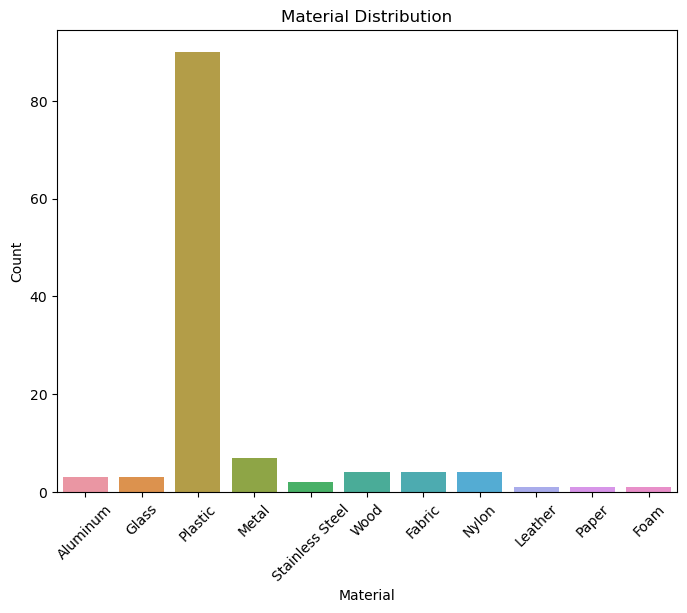

In [15]:
# Plot Material Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Material', data=df)
plt.title('Material Distribution')
plt.xlabel('Material')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

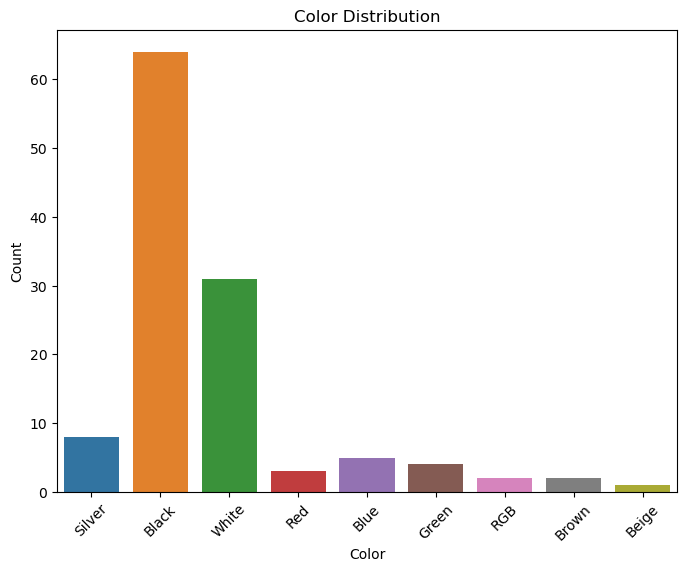

In [16]:
# Plot Color Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Color', data=df)
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\maste\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


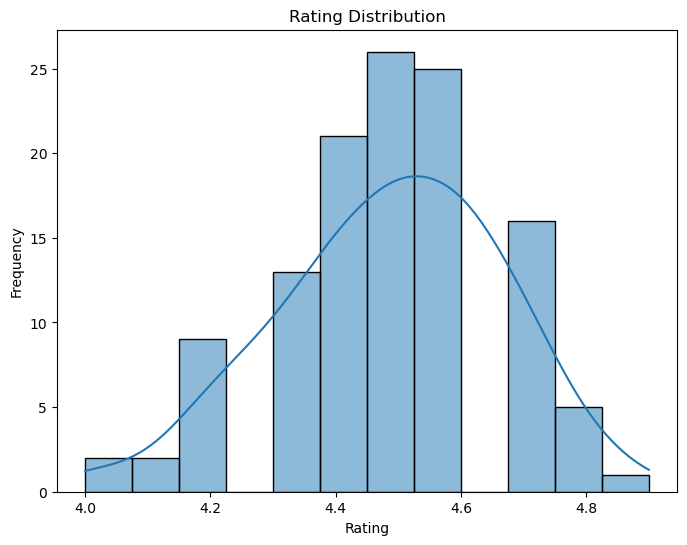

In [17]:
# Plot Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\maste\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


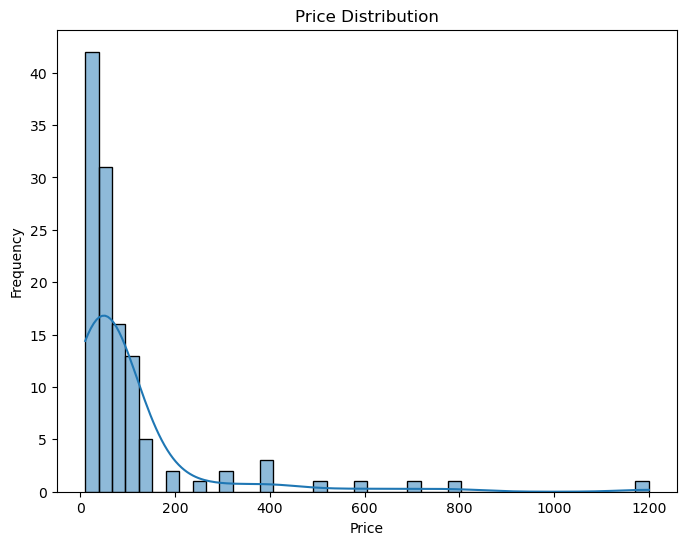

In [18]:
# Plot Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Feature Engineering

In [19]:
df.isnull().sum()

ProductID      0
ProductName    0
Brand          0
Category       0
Weight         0
Dimensions     0
Material       0
Color          0
Rating         0
NumReviews     0
Price          0
dtype: int64

In [20]:
df.drop("ProductID" , axis = 1, inplace = True)
df.drop("ProductName" , axis = 1, inplace = True)
df.drop("Brand" , axis = 1, inplace = True)

In [21]:
df.head()

,Category,Weight,Dimensions,Material,Color,Rating,NumReviews,Price
0,Laptops,2.5,13x9x0.7,Aluminum,Silver,4.5,120,1200
1,Mobile Phones,0.2,5.7x2.8x0.3,Glass,Black,4.8,300,800
2,Electronics,0.4,8x7x2,Plastic,White,4.3,80,100
3,Wearable Tech,0.1,1.5x1.5x0.4,Plastic,Black,4.6,150,250
4,Audio Devices,1.0,7x7x3,Metal,Red,4.2,50,80


In [22]:
df["Category"].value_counts()

Category
Home & Office            28
Kitchen Appliances        9
Audio Devices             8
Computer Accessories      8
Car Accessories           6
Outdoor & Sports          6
Home Security             5
Home Appliances           5
Health & Wellness         4
Apparel & Accessories     4
Home Automation           4
Mobile Accessories        4
Pet Supplies              3
Personal Care             3
Fitness & Health          3
Wearable Tech             3
Travel & Luggage          2
Photography               2
Home & Garden             2
Gardening & Lawn Care     1
Home Decor                1
Kitchen Accessories       1
Parenting & Baby Care     1
Laptops                   1
Office Supplies           1
Mobile Phones             1
Tablets                   1
Video Games               1
Electronics               1
Cycling Accessories       1
Name: count, dtype: int64

In [23]:
# Category

category_labels = {
    "Home & Office": 0,
    "Kitchen Appliances": 1,
    "Audio Devices": 2,
    "Computer Accessories": 3,
    "Car Accessories": 4,
    "Outdoor & Sports": 5,
    "Home Security": 6,
    "Home Appliances": 7,
    "Health & Wellness": 8,
    "Apparel & Accessories": 9,
    "Home Automation": 10,
    "Mobile Accessories": 11,
    "Pet Supplies": 12,
    "Personal Care": 13,
    "Fitness & Health": 14,
    "Wearable Tech": 15,
    "Travel & Luggage": 16,
    "Photography": 17,
    "Home & Garden": 18,
    "Gardening & Lawn Care": 19,
    "Home Decor": 20,
    "Kitchen Accessories": 21,
    "Parenting & Baby Care": 22,
    "Laptops": 23,
    "Office Supplies": 24,
    "Mobile Phones": 25,
    "Tablets": 26,
    "Video Games": 27,
    "Electronics": 28,
    "Cycling Accessories": 29
}

df['Category_Label'] = df['Category'].map(category_labels)
df.drop("Category" , axis = 1 , inplace = True)

In [24]:
from sklearn.preprocessing import LabelEncoder

# Splitting the dimensions strings and converting substrings to floats
df[['Length', 'Width', 'Height']] = df['Dimensions'].str.split('x', expand=True).astype(float)

# Drop the original 'Dimensions' column
df.drop('Dimensions', axis=1, inplace=True)

In [25]:
df.head()

,Weight,Material,Color,Rating,NumReviews,Price,Category_Label,Length,Width,Height
0,2.5,Aluminum,Silver,4.5,120,1200,23,13.0,9.0,0.7
1,0.2,Glass,Black,4.8,300,800,25,5.7,2.8,0.3
2,0.4,Plastic,White,4.3,80,100,28,8.0,7.0,2.0
3,0.1,Plastic,Black,4.6,150,250,15,1.5,1.5,0.4
4,1.0,Metal,Red,4.2,50,80,2,7.0,7.0,3.0


In [26]:
df["Material"].value_counts()

Material
Plastic            90
Metal               7
Wood                4
Fabric              4
Nylon               4
Aluminum            3
Glass               3
Stainless Steel     2
Leather             1
Paper               1
Foam                1
Name: count, dtype: int64

In [27]:
material_labels = {
    "Plastic": 0,
    "Metal": 1,
    "Wood": 2,
    "Fabric": 3,
    "Nylon": 4,
    "Aluminum": 5,
    "Glass": 6,
    "Stainless Steel": 7,
    "Leather": 8,
    "Paper": 9,
    "Foam": 10
}

# Apply the labels to the 'Material' column
df['Material_Label'] = df['Material'].map(material_labels)
df.drop("Material" , axis = 1 , inplace = True)

In [28]:
df.shape

(120, 10)

In [29]:
df.head()

,Weight,Color,Rating,NumReviews,Price,Category_Label,Length,Width,Height,Material_Label
0,2.5,Silver,4.5,120,1200,23,13.0,9.0,0.7,5
1,0.2,Black,4.8,300,800,25,5.7,2.8,0.3,6
2,0.4,White,4.3,80,100,28,8.0,7.0,2.0,0
3,0.1,Black,4.6,150,250,15,1.5,1.5,0.4,0
4,1.0,Red,4.2,50,80,2,7.0,7.0,3.0,1


In [30]:
df["Color"].value_counts()

Color
Black     64
White     31
Silver     8
Blue       5
Green      4
Red        3
RGB        2
Brown      2
Beige      1
Name: count, dtype: int64

In [31]:
color_labels = {
    "Black": 0,
    "White": 1,
    "Silver": 2,
    "Blue": 3,
    "Green": 4,
    "Red": 5,
    "RGB": 6,
    "Brown": 7,
    "Beige": 8
}

# Apply the labels to the 'Color' column
df['Color_Label'] = df['Color'].map(color_labels)
df.drop("Color" , axis = 1 , inplace = True)

In [32]:
df.head()

,Weight,Rating,NumReviews,Price,Category_Label,Length,Width,Height,Material_Label,Color_Label
0,2.5,4.5,120,1200,23,13.0,9.0,0.7,5,2
1,0.2,4.8,300,800,25,5.7,2.8,0.3,6,0
2,0.4,4.3,80,100,28,8.0,7.0,2.0,0,1
3,0.1,4.6,150,250,15,1.5,1.5,0.4,0,0
4,1.0,4.2,50,80,2,7.0,7.0,3.0,1,5


In [33]:
df.columns

Index(['Weight', 'Rating', 'NumReviews', 'Price', 'Category_Label', 'Length',
       'Width', 'Height', 'Material_Label', 'Color_Label'],
      dtype='object')

In [34]:
df = df.replace({True: 1, False: 0})

In [35]:
correlation_matrix = df.corr()

In [36]:
correlation_matrix

,Weight,Rating,NumReviews,Price,Category_Label,Length,Width,Height,Material_Label,Color_Label
Weight,1.000000,0.151751,0.274401,0.459568,-0.008930,0.869628,0.653406,0.340372,0.265543,-0.054337
Rating,0.151751,1.000000,0.675642,0.265281,0.271227,0.111447,0.131470,0.013262,0.184489,-0.033082
NumReviews,0.274401,0.675642,1.000000,0.195965,0.119899,0.224708,0.263050,0.241765,0.173566,-0.020106
Price,0.459568,0.265281,0.195965,1.000000,0.375178,0.384390,0.320746,0.014529,0.239697,-0.045195
Category_Label,-0.008930,0.271227,0.119899,0.375178,1.000000,-0.024875,-0.054552,-0.238509,0.017614,0.149970
Length,0.869628,0.111447,0.224708,0.384390,-0.024875,1.000000,0.821120,0.347022,0.385504,-0.026277
Width,0.653406,0.131470,0.263050,0.320746,-0.054552,0.821120,1.000000,0.533891,0.353585,0.004668
Height,0.340372,0.013262,0.241765,0.014529,-0.238509,0.347022,0.533891,1.000000,0.003239,0.117762
Material_Label,0.265543,0.184489,0.173566,0.239697,0.017614,0.385504,0.353585,0.003239,1.000000,-0.120360
Color_Label,-0.054337,-0.033082,-0.020106,-0.045195,0.149970,-0.026277,0.004668,0.117762,-0.120360,1.000000


In [37]:
x = df.drop("Price" , axis = 1)
y = df[["Price"]]

In [38]:
x.head()

,Weight,Rating,NumReviews,Category_Label,Length,Width,Height,Material_Label,Color_Label
0,2.5,4.5,120,23,13.0,9.0,0.7,5,2
1,0.2,4.8,300,25,5.7,2.8,0.3,6,0
2,0.4,4.3,80,28,8.0,7.0,2.0,0,1
3,0.1,4.6,150,15,1.5,1.5,0.4,0,0
4,1.0,4.2,50,2,7.0,7.0,3.0,1,5


In [39]:
x.columns

Index(['Weight', 'Rating', 'NumReviews', 'Category_Label', 'Length', 'Width',
       'Height', 'Material_Label', 'Color_Label'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt  # for calculating RMSE

n_estimators = 100  # Number of trees in the forest
max_depth = 5       # Maximum depth of each tree

# Create the RandomForestRegressor object
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)

# Train the model
model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate evaluation metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Training Set:")
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("Mean Absolute Error:", mae_train)

print("\nTesting Set:")
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("Mean Absolute Error:", mae_test)

Training Set:
Mean Squared Error: 2349.358485190485
Root Mean Squared Error: 48.47018140249204
Mean Absolute Error: 30.72016871643463

Testing Set:
Mean Squared Error: 30423.15654680861
Root Mean Squared Error: 174.42235105286423
Mean Absolute Error: 65.11307178544264


C:\Users\maste\AppData\Local\Temp\ipykernel_528\1799856146.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [42]:
import pickle

def dump_model_to_pkl(model, filename):
  """Dumps a trained machine learning model to a pickle file.

  Args:
      model: The trained machine learning model object to be saved.
      filename (str): The name of the pickle file to create.
  """

  try:
    with open(filename, 'wb') as f:
      pickle.dump(model, f)
    print(f"Model successfully saved to '{filename}'.")

  except Exception as e:
    print(f"Error saving model: {e}")

In [43]:
dump_model_to_pkl(model , "product_price_recommendation_model.pkl")

Model successfully saved to 'product_price_recommendation_model.pkl'.
